In [1]:
#Import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import graphing utilities
import utilities.graphing_utils as utl

%matplotlib inline

#Import models
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import statsmodels as sm
import statsmodels.formula.api as smf
import joblib

In [2]:
model_lasso = joblib.load('model_5_lasso.sav')
model = joblib.load('model_5_lr.sav')
df = pd.read_csv('./datasets/model_df.csv').drop(columns='Unnamed: 0')

In [3]:
df.head()

,overall_qual,year_built,year_remod/add,mas_vnr_area,neighborhood,total_bsmt_sf,totrms_abvgrd,gr_liv_area,full_bath,garage_area,kitchen_qual,saleprice
0,6,34,5,289.0,3,725.0,6,1479,2,475.0,4,130500
1,7,14,13,132.0,3,913.0,8,2122,2,559.0,4,220000
2,5,57,3,0.0,3,1057.0,5,1057,1,246.0,4,109000
3,5,4,3,0.0,5,384.0,7,1444,2,400.0,3,174000
4,6,110,17,0.0,3,676.0,6,1445,2,484.0,3,138500


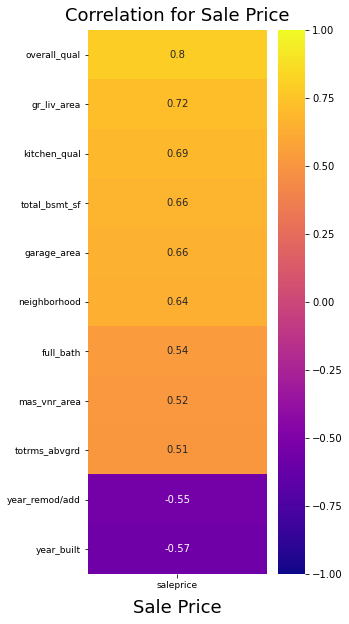

In [4]:
utl.one_corr_heatmap(df, 'saleprice', 'Correlation for Sale Price', 'Sale Price')

* The correlation of the features and sale price are all strongly negative or positive correlation. 
* Below is a list of edits that were done to ensure that the features included in the model included the features that had a strong correlation 
  * Remove - wood_deck_sf, all neighborhoods, condition 1 and 2, ms_zoning, land_contour
  * then look at combining year_remod/add, year built -- model was better beforehand go back
  * separate the overall quality and overall condition because model performs better without them combined
  * remove overall_cond - correlation with sales price is close to zero.



In [5]:
#referenced https://datascienceparichay.com/article/get-column-names-as-list-in-pandas-dataframe/
features = list(df)
features.remove('saleprice')
features

['overall_qual',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'neighborhood',
 'total_bsmt_sf',
 'totrms_abvgrd',
 'gr_liv_area',
 'full_bath',
 'garage_area',
 'kitchen_qual']

<Figure size 1800x720 with 0 Axes>

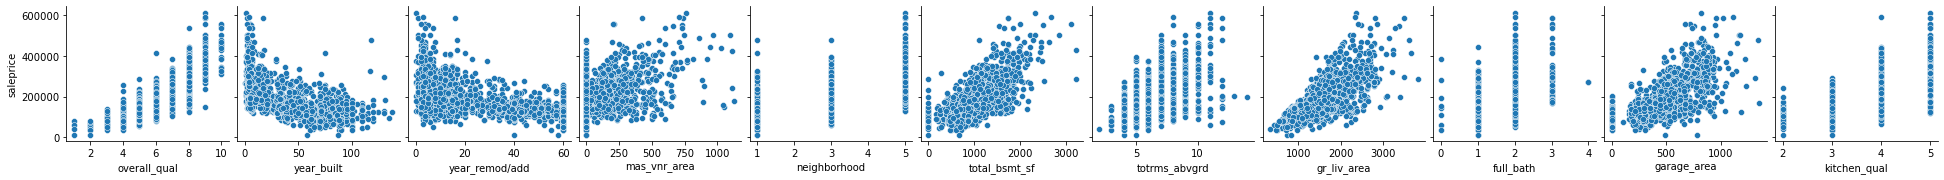

In [6]:
plt.figure(figsize=(25,10))
sns.pairplot(data = df,x_vars = features, y_vars=['saleprice']);

The scatter plot above show that there is a main linear releationship between sale price and the features above. Some of the graphs have curves to them. Polynomial features helped to smooth those out.

<Figure size 1440x1080 with 0 Axes>

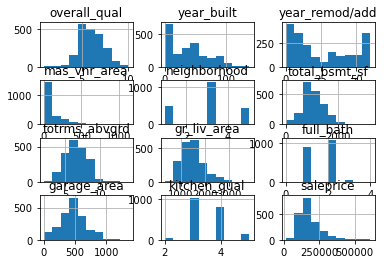

In [7]:
plt.figure(figsize= (20,15), tight_layout = False)
df.hist();

In [8]:
coef_lr = pd.DataFrame(list(zip(df[features], model.coef_)), columns = ['feature', 'coef'])

In [9]:
coef_lr.sort_values(by = 'coef' )

,feature,coef
8,full_bath,-9209.535909
6,totrms_abvgrd,-855.507708
2,year_remod/add,-231.255266
1,year_built,-53.213769
3,mas_vnr_area,32.277973
9,garage_area,33.260581
5,total_bsmt_sf,37.325644
7,gr_liv_area,58.446753
4,neighborhood,6219.516268
0,overall_qual,12466.549288


In [10]:
df.describe()

,overall_qual,year_built,year_remod/add,mas_vnr_area,neighborhood,total_bsmt_sf,totrms_abvgrd,gr_liv_area,full_bath,garage_area,kitchen_qual,saleprice
count,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000
mean,6.107474,38.345872,25.841231,97.295066,2.940401,1052.701514,6.429409,1495.588178,1.576453,472.606253,3.515388,181433.907181
std,1.421858,30.176259,21.036409,168.989796,1.341992,426.862874,1.545268,486.008801,0.549498,214.803910,0.663703,79311.825649
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,334.000000,0.000000,0.000000,2.000000,12789.000000
25%,5.000000,9.000000,6.000000,0.000000,3.000000,793.000000,5.000000,1128.000000,1.000000,319.000000,3.000000,129650.000000
50%,6.000000,36.000000,17.000000,0.000000,3.000000,994.000000,6.000000,1444.000000,2.000000,480.000000,3.000000,162500.000000
75%,7.000000,57.000000,46.000000,158.000000,3.000000,1316.500000,7.000000,1728.000000,2.000000,576.000000,4.000000,214000.000000
max,10.000000,138.000000,60.000000,1129.000000,5.000000,3206.000000,14.000000,3820.000000,4.000000,1356.000000,5.000000,611657.000000


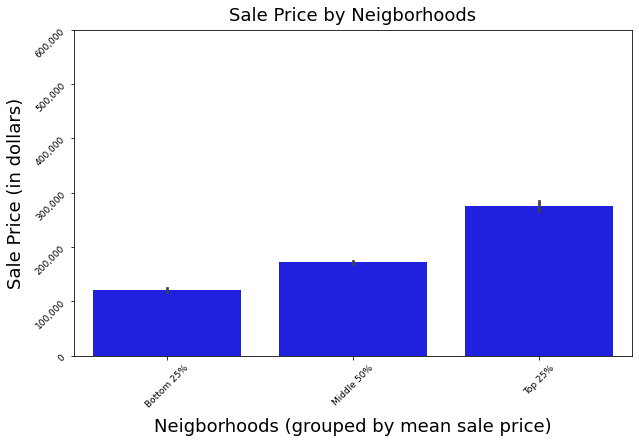

In [11]:
utl.my_barplot(df, 'neighborhood', 'saleprice', 'Sale Price by Neigborhoods', 'Neigborhoods (grouped by mean sale price)', 'Sale Price (in dollars)')
plt.xticks([0,1,2], ['Bottom 25%', 'Middle 50%', 'Top 25%'])
plt.yticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], ['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000'], 
          rotation = 45);

The average sale price grouped by neigborhoods

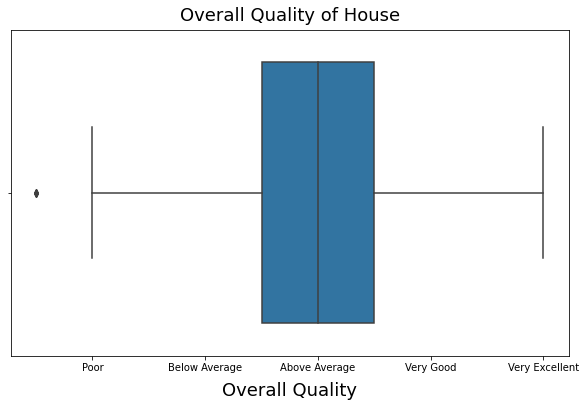

In [12]:
utl.my_boxplot(df, 'overall_qual', 'Overall Quality of House', 'Overall Quality')
plt.xticks(ticks = [2,4,6,8,10], labels = ['Poor', 'Below Average', 'Above Average', 'Very Good', 'Very Excellent']);

In [13]:
df['overall_qual'].describe()

count    2047.000000
mean        6.107474
std         1.421858
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall_qual, dtype: float64

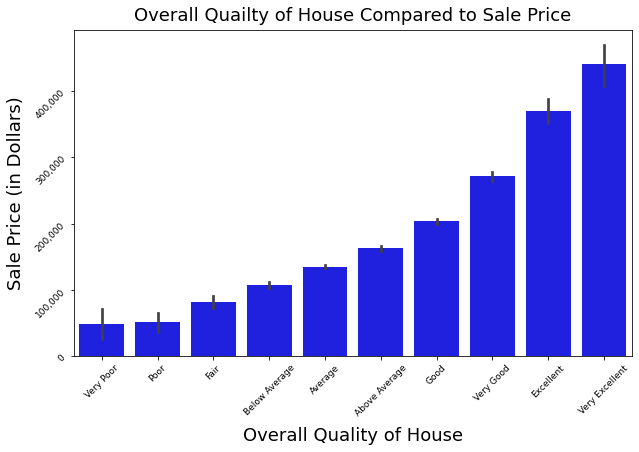

In [14]:
utl.my_barplot(df,'overall_qual', 'saleprice', 'Overall Quailty of House Compared to Sale Price', 'Overall Quality of House', 'Sale Price (in Dollars)')
plt.yticks([0, 100_000, 200_000, 300_000, 400_000], ['0', '100,000', '200,000', '300,000', '400,000'],
          rotation = 45);
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9], labels = ['Very Poor', 'Poor', 'Fair','Below Average', 'Average','Above Average', 'Good', 'Very Good','Excellent', 'Very Excellent']);

The overall quality of the house has a positive correlation with sale price. As the quality increases, the sale price also increases.

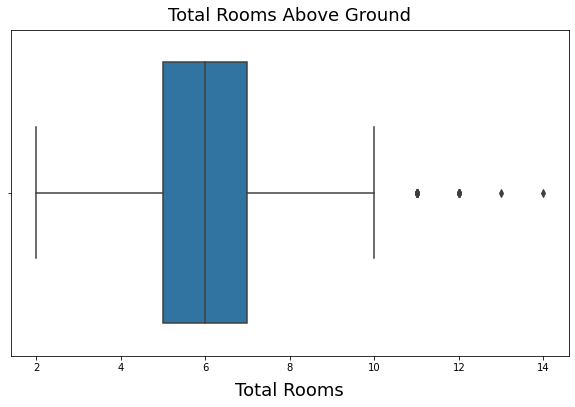

In [15]:
utl.my_boxplot(df, 'totrms_abvgrd', 'Total Rooms Above Ground', 'Total Rooms')

In [16]:
df['totrms_abvgrd'].describe()

count    2047.000000
mean        6.429409
std         1.545268
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: totrms_abvgrd, dtype: float64

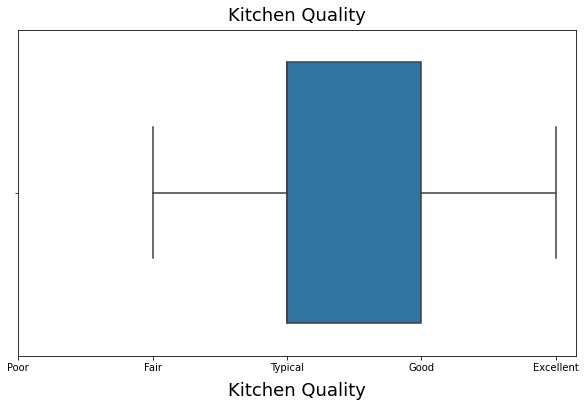

In [17]:
utl.my_boxplot(df, 'kitchen_qual', 'Kitchen Quality', 'Kitchen Quality')
plt.xticks(ticks = [1,2,3,4,5], labels = ['Poor', 'Fair', 'Typical', 'Good', 'Excellent']);

In [18]:
df['kitchen_qual'].describe()

count    2047.000000
mean        3.515388
std         0.663703
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: kitchen_qual, dtype: float64

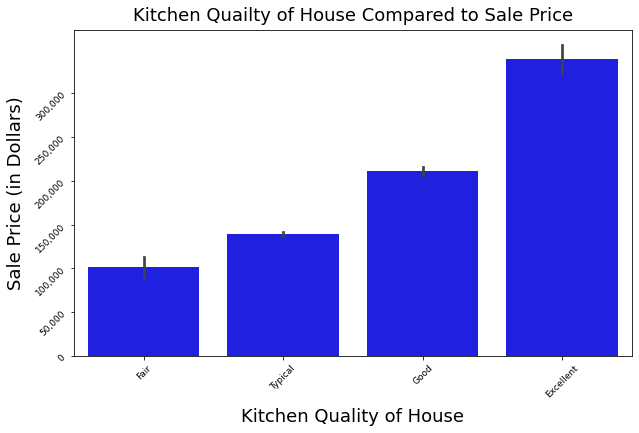

In [19]:
utl.my_barplot(df,'kitchen_qual', 'saleprice', 'Kitchen Quailty of House Compared to Sale Price', 'Kitchen Quality of House', 'Sale Price (in Dollars)')
plt.xticks(ticks = [0,1,2,3], labels = [ 'Fair', 'Typical', 'Good', 'Excellent'])
plt.yticks([0, 50_000, 100_000, 150_000, 200_000, 250_000, 300_000], ['0', '50,000', '100,000', '150,000', '200,000', '250,000', '300,000'],
          rotation = 45);

The kitchen quality has a positive correlation with sale price. As the quality increases, the sale price also increases.

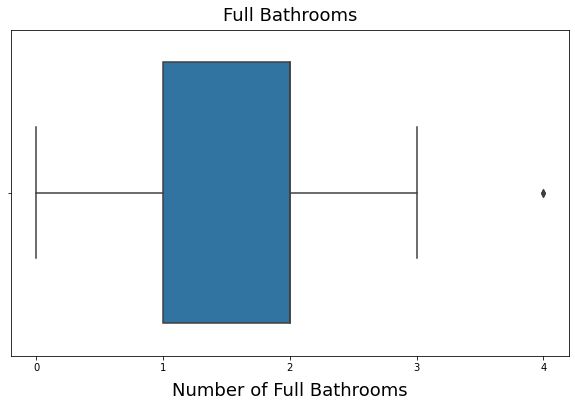

In [20]:
utl.my_boxplot(df, 'full_bath', 'Full Bathrooms', 'Number of Full Bathrooms')
plt.xticks(ticks = [0,1,2,3,4]);

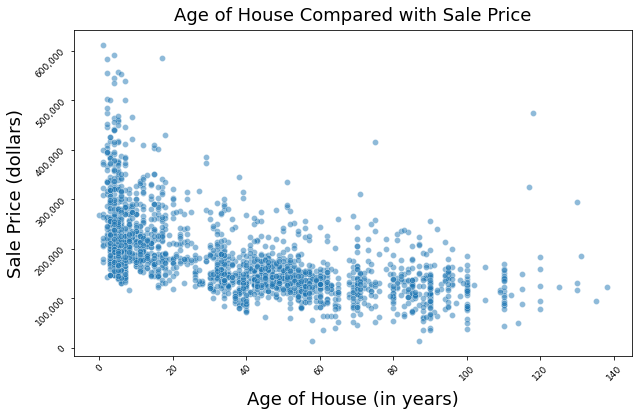

In [21]:
utl.my_scatterplot(df, 'year_built', 'saleprice','Age of House Compared with Sale Price', 'Age of House (in years)','Sale Price (dollars)' , .5)
plt.yticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], ['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000'], 
          rotation = 45);

The age of the house has a negative correlation with sale price. As the age increases, the sale price decreases.

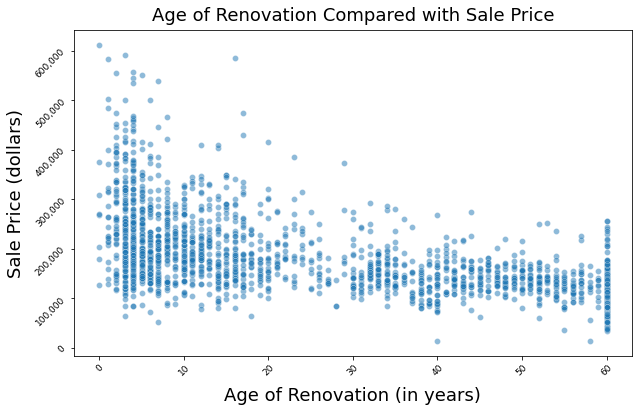

In [22]:
utl.my_scatterplot(df, 'year_remod/add', 'saleprice','Age of Renovation Compared with Sale Price', 'Age of Renovation (in years)','Sale Price (dollars)' , .5)
plt.yticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], ['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000'],
          rotation = 45);

The age of the renovation has a negative correlation with sale price. As the age increases, the sale price decreases.

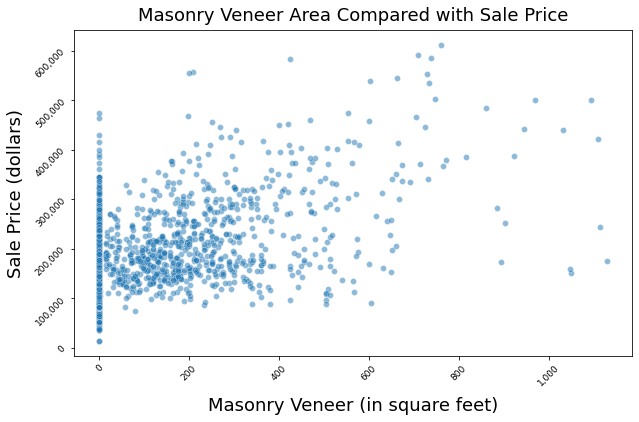

In [23]:
utl.my_scatterplot(df, 'mas_vnr_area', 'saleprice','Masonry Veneer Area Compared with Sale Price', 'Masonry Veneer (in square feet)','Sale Price (dollars)' , .5)
plt.yticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], ['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000'],
          rotation = 45)
plt.xticks([0, 200, 400, 600, 800, 1_000], ['0', '200', '400', '600', '800', '1,000']);

The masonry veneer in square feet has a positive correlation with sale price. As square footage of the masonry veneer  increases, the sale price increases.

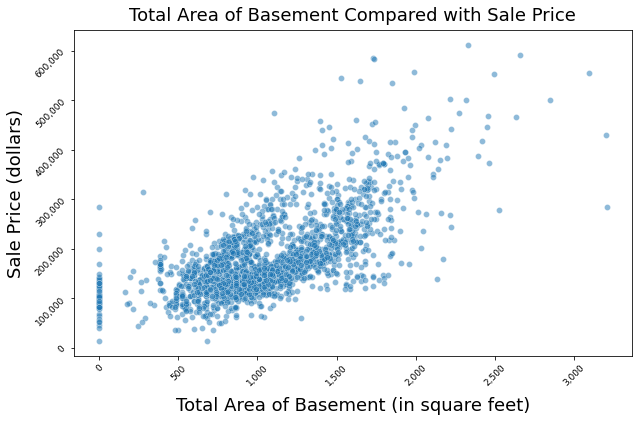

In [24]:
utl.my_scatterplot(df, 'total_bsmt_sf', 'saleprice','Total Area of Basement Compared with Sale Price', 'Total Area of Basement (in square feet)','Sale Price (dollars)' , .5)
plt.xticks([0, 500, 1_000, 1_500, 2_000, 2_500, 3_000], ['0', '500', '1,000', '1,500', '2,000', '2,500', '3,000'])
plt.yticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], ['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000'],
          rotation = 45);

The area of the basement in square feet has a positive correlation with sale price. As square footage of the area basement  increases, the sale price increases.

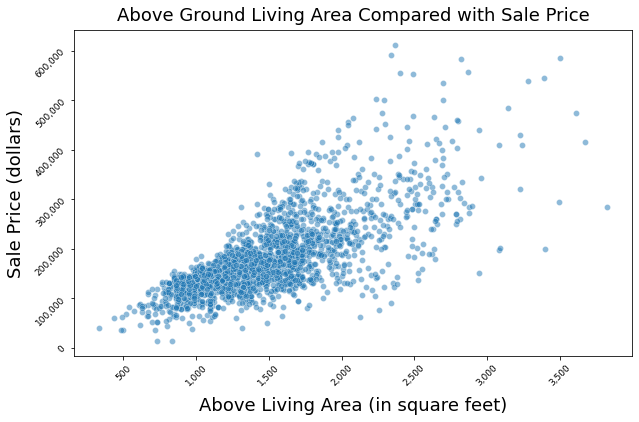

In [25]:
utl.my_scatterplot(df, 'gr_liv_area', 'saleprice','Above Ground Living Area Compared with Sale Price', 'Above Living Area (in square feet)','Sale Price (dollars)' , .5)
plt.xticks([500, 1_000, 1_500, 2_000, 2_500, 3_000, 3_500], ['500', '1,000', '1,500', '2,000', '2,500', '3,000','3,500'])
plt.yticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], ['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000'],
          rotation = 45);

The area above ground in square feet has a positive correlation with sale price. As square footage of the above ground living space increases, the sale price increases.

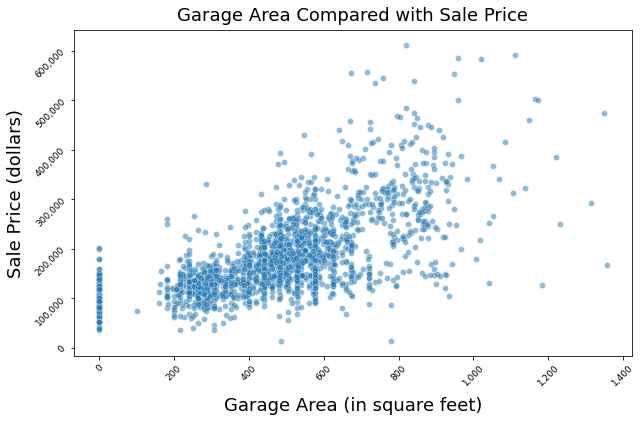

In [26]:
utl.my_scatterplot(df, 'garage_area', 'saleprice','Garage Area Compared with Sale Price', 'Garage Area (in square feet)','Sale Price (dollars)', .5)
plt.xticks([0, 200, 400, 600, 800, 1_000, 1_200, 1_400], ['0', '200', '400', '600', '800', '1,000', '1,200','1,400'])
plt.yticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], ['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000'],
          rotation = 45);

The garage area in square feet has a positive correlation with sale price. As square footage of the garage area increases, the sale price increases.